In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from merf.merf import MERF
from sklearn.model_selection import train_test_split
from merf.evaluator import plot_bhat, plot_training_stats

# Sleep Study

We evaluate the performance of MERF on a famous sleep study dataset with 180 samples and 18 clusters (with 10 samples each). 

In [2]:
sleep_df = pd.read_csv('../data/sleepstudy.csv')

Text(0,0.5,'Reaction')

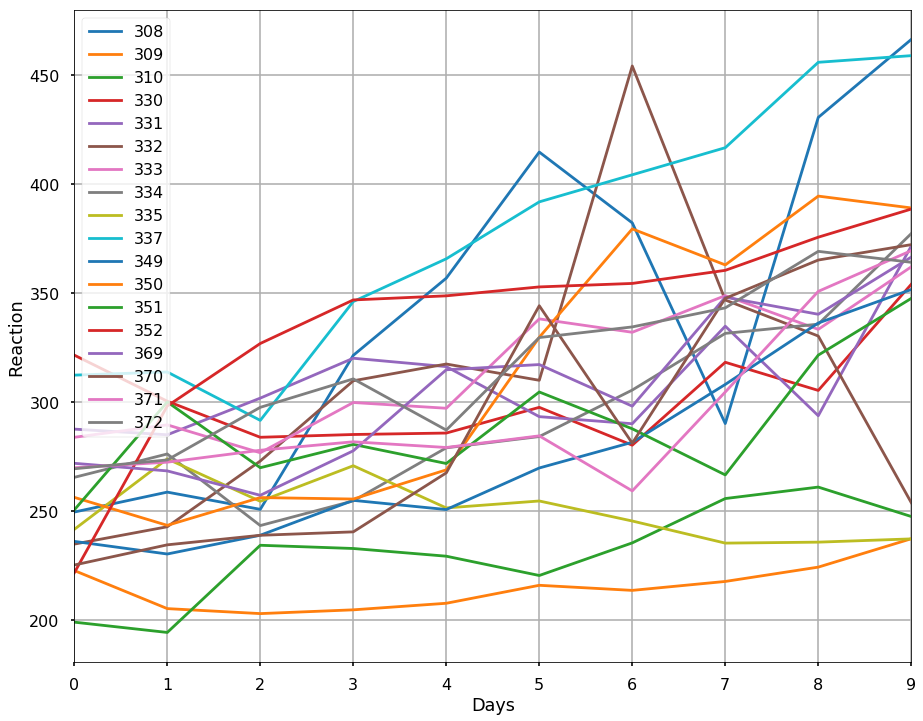

In [3]:
fig, ax = plt.subplots(figsize=(15,12))
for label, group in sleep_df.groupby('Subject'):
    group.plot(x='Days', y='Reaction', ax=ax, label=label)
plt.legend()
plt.grid('on')
plt.ylabel('Reaction')

In [4]:
sleep_df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


INFO     [merf.py:235] GLL is 1420.5298429160837 at iteration 1.
INFO     [merf.py:235] GLL is 1420.1822690278218 at iteration 2.
INFO     [merf.py:235] GLL is 1419.2415819372834 at iteration 3.
INFO     [merf.py:235] GLL is 1419.865271698258 at iteration 4.
INFO     [merf.py:235] GLL is 1419.8422069224935 at iteration 5.
INFO     [merf.py:235] GLL is 1422.105169859982 at iteration 6.
INFO     [merf.py:235] GLL is 1421.0152309347086 at iteration 7.
INFO     [merf.py:235] GLL is 1419.2583524790114 at iteration 8.
INFO     [merf.py:235] GLL is 1417.9744934261598 at iteration 9.
INFO     [merf.py:235] GLL is 1419.7738416438528 at iteration 10.
INFO     [merf.py:235] GLL is 1419.0502355394638 at iteration 11.
INFO     [merf.py:235] GLL is 1418.4614752106309 at iteration 12.
INFO     [merf.py:235] GLL is 1418.9356614541846 at iteration 13.
INFO     [merf.py:235] GLL is 1418.9765618103102 at iteration 14.
INFO     [merf.py:235] GLL is 1420.1284920730793 at iteration 15.
INFO     [merf.py:235

Text(0.5,1,'MSE RF = 12.385, MSE MERF = 8.179')

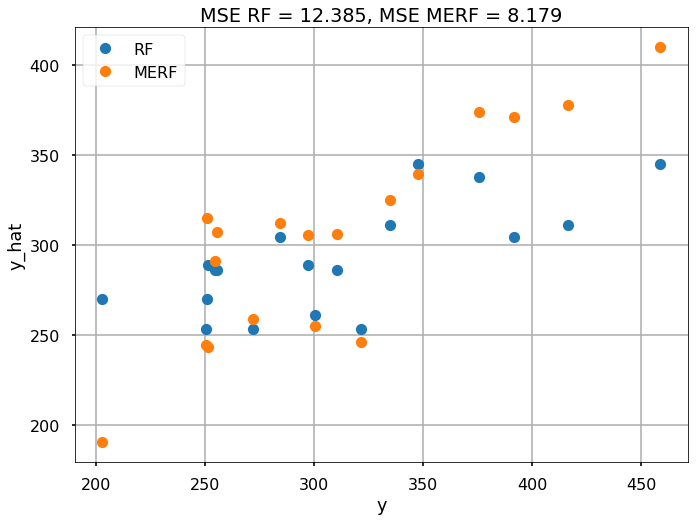

In [5]:
train, test = train_test_split(sleep_df, test_size=0.1, shuffle=True)
y = test['Reaction']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['Days']], train['Reaction'])
yhat_rf = rf.predict(test[['Days']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=20)
X_train =  train[['Days']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['Subject']
y_train = train['Reaction']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['Days']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['Subject']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')

plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}'.format(mse_rf, mse_mrf))

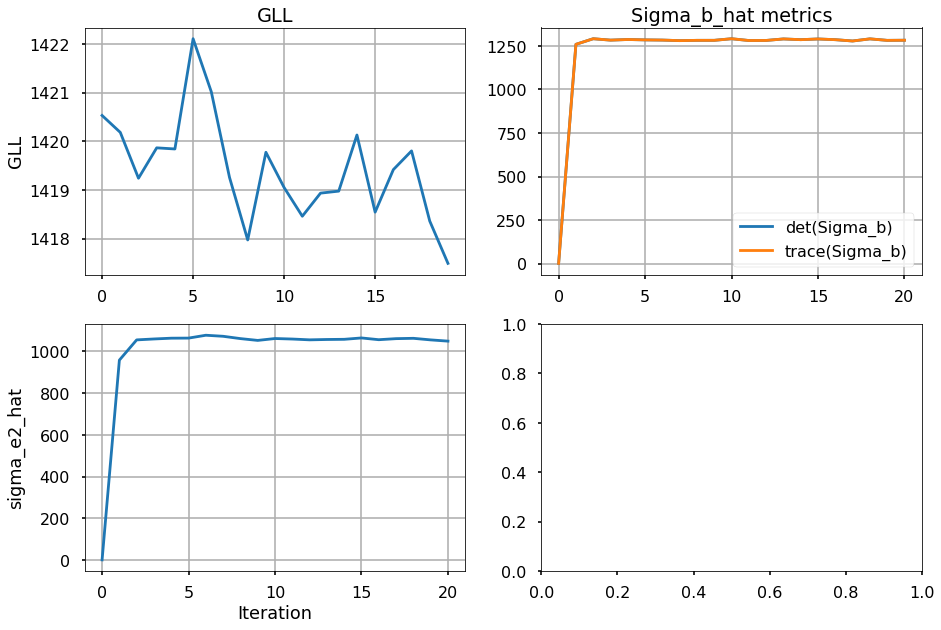

In [11]:
plot_training_stats(mrf)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


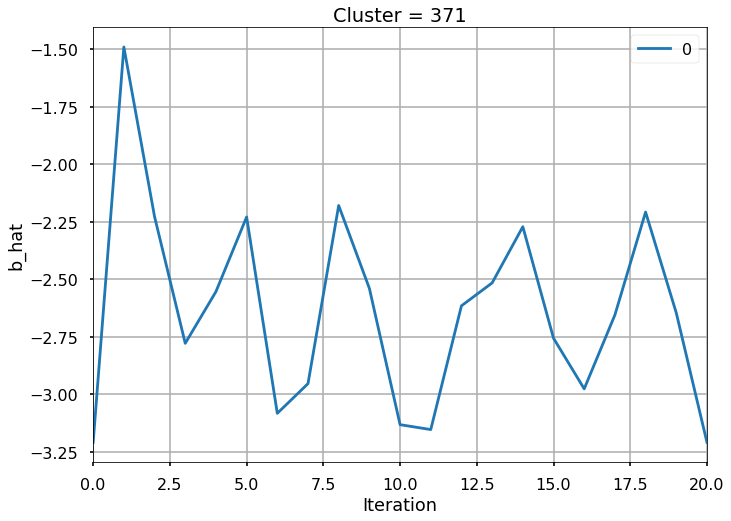

In [38]:
bb = plot_bhat(mrf, 371)

# Radon

We evaluate the performance of MERF on the famous Minnesota radon dataset. 

In [39]:
radon_df = pd.read_csv('../data/radon.csv')

In [40]:
radon_df.head()

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [41]:
radon_df[['floor', 'Uppm', 'county', 'log_radon']].head()

,floor,Uppm,county,log_radon
0,1.0,0.502054,AITKIN,0.832909
1,0.0,0.502054,AITKIN,0.832909
2,0.0,0.502054,AITKIN,1.098612
3,0.0,0.502054,AITKIN,0.095310
4,0.0,0.428565,ANOKA,1.163151


INFO     [merf.py:235] GLL is 172.7459396000057 at iteration 1.
INFO     [merf.py:235] GLL is 142.75902280726442 at iteration 2.
INFO     [merf.py:235] GLL is 128.36060035703997 at iteration 3.
INFO     [merf.py:235] GLL is 120.37219000966978 at iteration 4.
INFO     [merf.py:235] GLL is 116.80949051680771 at iteration 5.
INFO     [merf.py:235] GLL is 112.42551880693037 at iteration 6.
INFO     [merf.py:235] GLL is 110.51917727585011 at iteration 7.
INFO     [merf.py:235] GLL is 109.25738737231342 at iteration 8.
INFO     [merf.py:235] GLL is 109.2356831211658 at iteration 9.
INFO     [merf.py:235] GLL is 109.51297815095091 at iteration 10.
INFO     [merf.py:235] GLL is 106.53121127414647 at iteration 11.
INFO     [merf.py:235] GLL is 106.20574224842483 at iteration 12.
INFO     [merf.py:235] GLL is 106.8061835787145 at iteration 13.
INFO     [merf.py:235] GLL is 106.04592988789526 at iteration 14.
INFO     [merf.py:235] GLL is 106.40642586252174 at iteration 15.
INFO     [merf.py:235]

Text(0.5,1,'MSE RF = 0.080, MSE MERF = 0.079, MSE MERF+Uppm = 0.079, MSE MERF all = 0.078')

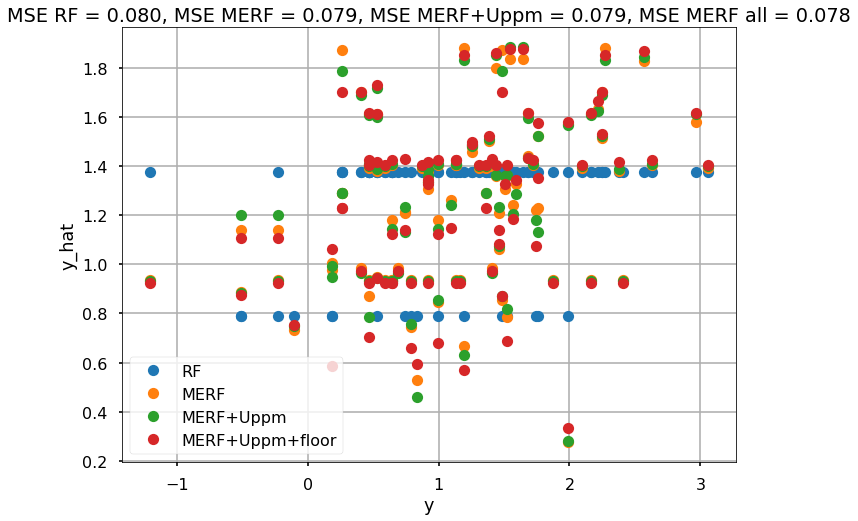

In [42]:
max_iter = 20
train, test = train_test_split(radon_df, test_size=0.1, shuffle=True)
y = test['log_radon']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['floor']], train['log_radon'])
yhat_rf = rf.predict(test[['floor']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['county']
y_train = train['log_radon']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['floor']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['county']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Mixed Effects Random Forest Training with County-level covariate (uranium)
mrf_uranium = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_uranium.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium)
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'])).T
clusters_test = test['county']
yhat_mrf_uranium = mrf_uranium.predict(X_test, Z_test, clusters_test)

# Mixed Effects Random Forest Training with County-level covariate (uranium) and Fixed Effect Covariate as random effect
mrf_all = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'], train['floor'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_all.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium) and Fixed Effect Covariate as random effect
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'], test['floor'])).T
clusters_test = test['county']
yhat_mrf_all = mrf_all.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)
mse_mrf_uranium = np.sqrt(np.sum((y - yhat_mrf_uranium)**2)) / len(y)
mse_mrf_all = np.sqrt(np.sum((y - yhat_mrf_all)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.plot(y, yhat_mrf_uranium, 'o', label='MERF+Uppm')
plt.plot(y, yhat_mrf_all, 'o', label='MERF+Uppm+floor')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')
plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}, MSE MERF+Uppm = {:.3f}, MSE MERF all = {:.3f}'.format(mse_rf, mse_mrf, mse_mrf_uranium, mse_mrf_all))

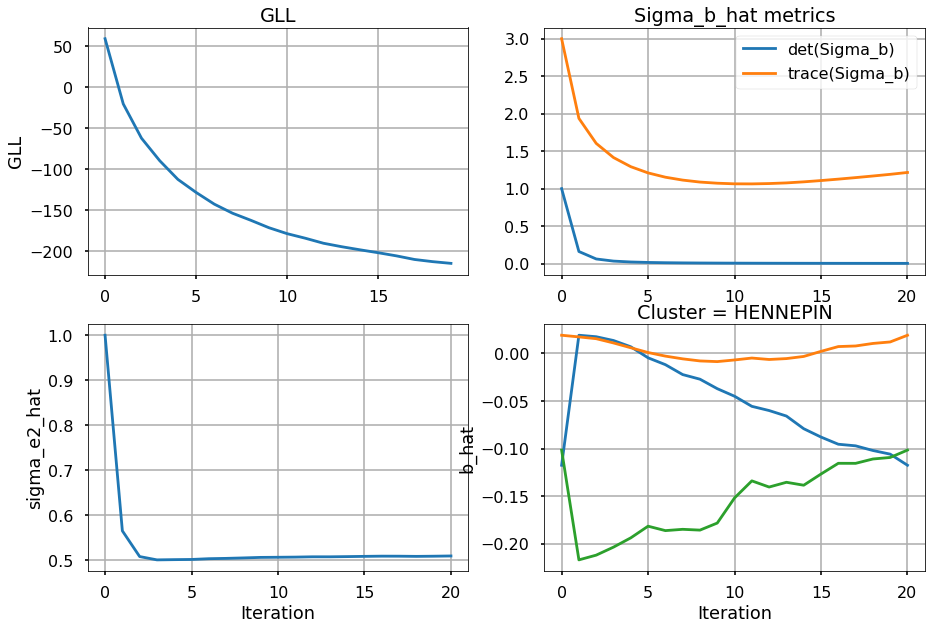

In [63]:
plot_training_stats(mrf_all)

/Users/souravdey/.virtualenvs/merf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


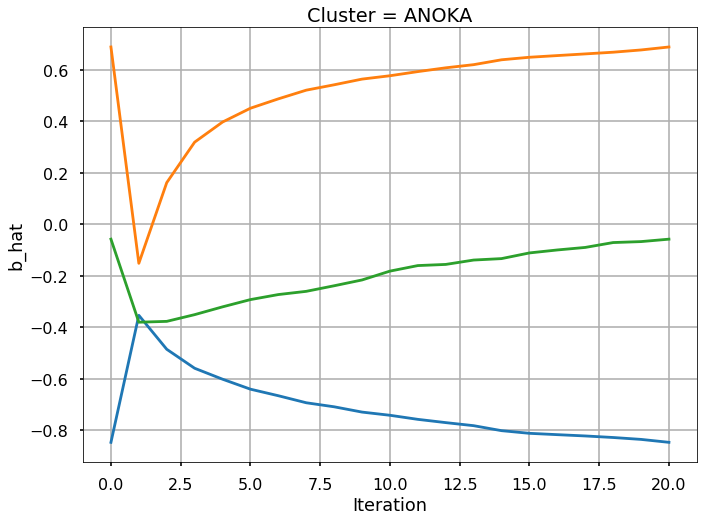

In [64]:
bb = plot_bhat(mrf_all, 3)

In [137]:
# Mixed Effects Random Forest Training with County-level covariate (uranium)
mrf_uranium = MERF(n_estimators=100, max_iterations=200)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_uranium.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium)
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'])).T
clusters_test = test['county']
yhat_mrf_uranium = mrf_uranium.predict(X_test, Z_test, clusters_test)

INFO     [merf.py:235] GLL is 128.68421036996224 at iteration 1.
INFO     [merf.py:235] GLL is 69.57613284008242 at iteration 2.
INFO     [merf.py:235] GLL is 40.925932312715105 at iteration 3.
INFO     [merf.py:235] GLL is 19.436182677874 at iteration 4.
INFO     [merf.py:235] GLL is 3.2460318360354496 at iteration 5.
INFO     [merf.py:235] GLL is -8.824255606449828 at iteration 6.
INFO     [merf.py:235] GLL is -18.57368166437615 at iteration 7.
INFO     [merf.py:235] GLL is -25.683701801986047 at iteration 8.
INFO     [merf.py:235] GLL is -32.43532708924883 at iteration 9.
INFO     [merf.py:235] GLL is -36.368563422593766 at iteration 10.
INFO     [merf.py:235] GLL is -42.02909426176245 at iteration 11.
INFO     [merf.py:235] GLL is -45.283458548661564 at iteration 12.
INFO     [merf.py:235] GLL is -47.928679521324376 at iteration 13.
INFO     [merf.py:235] GLL is -50.74379712250314 at iteration 14.
INFO     [merf.py:235] GLL is -52.97801827565105 at iteration 15.
INFO     [merf.py:2

INFO     [merf.py:235] GLL is -122.22648101680883 at iteration 125.
INFO     [merf.py:235] GLL is -124.58455829475396 at iteration 126.
INFO     [merf.py:235] GLL is -124.31504719138987 at iteration 127.
INFO     [merf.py:235] GLL is -124.86620241540999 at iteration 128.
INFO     [merf.py:235] GLL is -124.75154463123819 at iteration 129.
INFO     [merf.py:235] GLL is -125.66287633729205 at iteration 130.
INFO     [merf.py:235] GLL is -125.89933421505808 at iteration 131.
INFO     [merf.py:235] GLL is -126.56872158907248 at iteration 132.
INFO     [merf.py:235] GLL is -126.6580513606738 at iteration 133.
INFO     [merf.py:235] GLL is -127.4756160967684 at iteration 134.
INFO     [merf.py:235] GLL is -128.13758561798443 at iteration 135.
INFO     [merf.py:235] GLL is -129.23381762400857 at iteration 136.
INFO     [merf.py:235] GLL is -128.98265293733098 at iteration 137.
INFO     [merf.py:235] GLL is -128.39781510593141 at iteration 138.
INFO     [merf.py:235] GLL is -130.20337656147203 

In [142]:
# Mixed Effects Random Forest Training with County-level covariate (uranium)
mrf_uranium = MERF(n_estimators=100, max_iterations=200)
X_train =  train[['floor']]
Z_train = np.array((np.ones(len(X_train)), train['Uppm'], train['floor'])).T
clusters_train = train['county']
y_train = train['log_radon']
mrf_uranium.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test with County-level covariate (uranium)
X_test =  test[['floor']]
Z_test = np.array((np.ones(len(X_test)), test['Uppm'], test['floor'])).T
clusters_test = test['county']
yhat_mrf_uranium = mrf_uranium.predict(X_test, Z_test, clusters_test)

INFO     [merf.py:235] GLL is 69.39289376901564 at iteration 1.
INFO     [merf.py:235] GLL is -16.689380675589394 at iteration 2.
INFO     [merf.py:235] GLL is -62.96621547588687 at iteration 3.
INFO     [merf.py:235] GLL is -96.3069923819607 at iteration 4.
INFO     [merf.py:235] GLL is -122.16424834487705 at iteration 5.
INFO     [merf.py:235] GLL is -144.63933161842928 at iteration 6.
INFO     [merf.py:235] GLL is -162.6116057362095 at iteration 7.
INFO     [merf.py:235] GLL is -176.63175195305323 at iteration 8.
INFO     [merf.py:235] GLL is -187.67182964236918 at iteration 9.
INFO     [merf.py:235] GLL is -198.91642668407357 at iteration 10.
INFO     [merf.py:235] GLL is -208.34082519029954 at iteration 11.
INFO     [merf.py:235] GLL is -217.4233361860858 at iteration 12.
INFO     [merf.py:235] GLL is -224.65377076471685 at iteration 13.
INFO     [merf.py:235] GLL is -230.31562594675358 at iteration 14.
INFO     [merf.py:235] GLL is -237.3560196674104 at iteration 15.
INFO     [me

INFO     [merf.py:235] GLL is -432.35012148142215 at iteration 125.
INFO     [merf.py:235] GLL is -432.90778074646215 at iteration 126.
INFO     [merf.py:235] GLL is -433.4791874376297 at iteration 127.
INFO     [merf.py:235] GLL is -432.94768504996944 at iteration 128.
INFO     [merf.py:235] GLL is -434.6142435744363 at iteration 129.
INFO     [merf.py:235] GLL is -436.3215195858883 at iteration 130.
INFO     [merf.py:235] GLL is -437.12784745171587 at iteration 131.
INFO     [merf.py:235] GLL is -436.1809388691018 at iteration 132.
INFO     [merf.py:235] GLL is -438.0998572650421 at iteration 133.
INFO     [merf.py:235] GLL is -438.55953290287306 at iteration 134.
INFO     [merf.py:235] GLL is -438.0605057896641 at iteration 135.
INFO     [merf.py:235] GLL is -439.63876696630723 at iteration 136.
INFO     [merf.py:235] GLL is -440.4749085287974 at iteration 137.
INFO     [merf.py:235] GLL is -442.07285700074635 at iteration 138.
INFO     [merf.py:235] GLL is -442.5365424612655 at ite

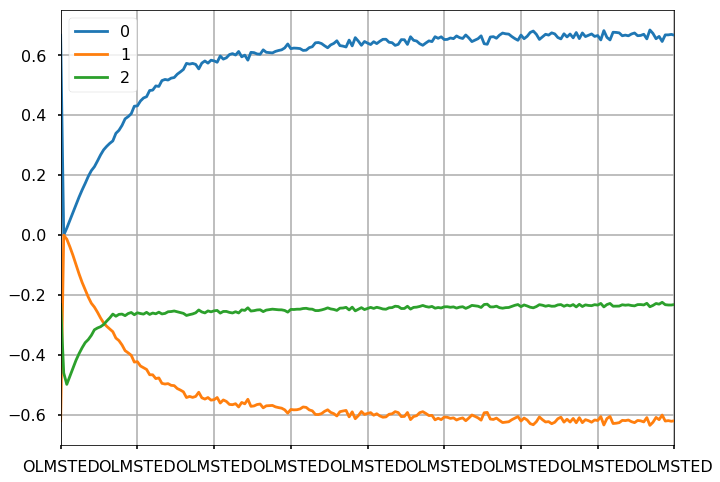

In [144]:
b_df = pd.concat(mrf_uranium.b_hat_history)
b_df.loc['OLMSTED'].plot()
plt.grid('on')